## Correlate Spec Params & ERP measures

### Merge exp results with param results

In [49]:
# Define paths
REPO_PATH = r"C:\Users\micha\projects\v1_v4_1024_elec" # set this
PROJECT_PATH = r'G:\Shared drives\v1_v4_1024'

# Dataset details
FS = 500 # sampling frequency

In [50]:
# general
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [51]:
# load dfs
erp_params_df = pd.read_csv(r'G:\Shared drives\v1_v4_1024\data\results\max_erp_params_df.csv', index_col=0)
spec_params_df = pd.read_csv(fr"{PROJECT_PATH}\data\results\lfp_spectral_params.csv", index_col=0)

In [52]:
spec_params_df

,session,channel,chan_idx,array,epoch,exp,r2
0,A_SNR_140819,0,0,1,pre,3.660094,0.998489
1,A_SNR_140819,1,1,1,pre,3.641594,0.998853
2,A_SNR_140819,2,2,1,pre,3.096264,0.994847
3,A_SNR_140819,3,3,1,pre,3.603246,0.998999
4,A_SNR_140819,4,4,1,pre,3.485834,0.998878
...,...,...,...,...,...,...,...
4091,L_SNR_250717,59,1019,16,post,2.765816,0.998221
4092,L_SNR_250717,60,1020,16,post,2.800549,0.999511
4093,L_SNR_250717,61,1021,16,post,2.944253,0.999020
4094,L_SNR_250717,62,1022,16,post,3.043717,0.998485


In [53]:
erp_params_df = erp_params_df.drop(["session.1","channel.1","array.1"], axis=1)
erp_params_df

,array,channel,peak_index,latency,amp,amp_abs,width
session,,,,,,,
A_SNR_140819,1,0,3,229,65.528083,65.528083,35.027186
A_SNR_140819,1,1,2,228,66.172736,66.172736,22.755828
A_SNR_140819,1,2,5,228,54.551556,54.551556,37.283867
A_SNR_140819,1,3,3,228,56.616983,56.616983,36.523619
A_SNR_140819,1,4,2,228,63.665214,63.665214,22.758948
...,...,...,...,...,...,...,...
L_SNR_250717,16,59,6,314,159.296016,159.296016,53.653837
L_SNR_250717,16,60,4,281,169.573607,169.573607,24.018671
L_SNR_250717,16,61,4,281,192.865965,192.865965,85.693658


In [54]:
spec_params_df = spec_params_df.loc[spec_params_df["epoch"]=="post"]
spec_params_df


,session,channel,chan_idx,array,epoch,exp,r2
1024,A_SNR_140819,0,0,1,post,4.409638,0.999214
1025,A_SNR_140819,1,1,1,post,4.448360,0.999085
1026,A_SNR_140819,2,2,1,post,4.079099,0.999065
1027,A_SNR_140819,3,3,1,post,4.603642,0.998497
1028,A_SNR_140819,4,4,1,post,4.313483,0.999089
...,...,...,...,...,...,...,...
4091,L_SNR_250717,59,1019,16,post,2.765816,0.998221
4092,L_SNR_250717,60,1020,16,post,2.800549,0.999511
4093,L_SNR_250717,61,1021,16,post,2.944253,0.999020
4094,L_SNR_250717,62,1022,16,post,3.043717,0.998485


In [55]:
# merge dataframes
results_df = pd.merge(left=erp_params_df, right=spec_params_df, on= ["session", "array", "channel"])
results_df.to_csv(r'G:\Shared drives\v1_v4_1024\data\results\spec_erp_results.csv')

In [56]:
results_df

,session,array,channel,peak_index,latency,amp,amp_abs,width,chan_idx,epoch,exp,r2
0,A_SNR_140819,1,0,3,229,65.528083,65.528083,35.027186,0,post,4.409638,0.999214
1,A_SNR_140819,1,1,2,228,66.172736,66.172736,22.755828,1,post,4.448360,0.999085
2,A_SNR_140819,1,2,5,228,54.551556,54.551556,37.283867,2,post,4.079099,0.999065
3,A_SNR_140819,1,3,3,228,56.616983,56.616983,36.523619,3,post,4.603642,0.998497
4,A_SNR_140819,1,4,2,228,63.665214,63.665214,22.758948,4,post,4.313483,0.999089
...,...,...,...,...,...,...,...,...,...,...,...,...
2043,L_SNR_250717,16,59,6,314,159.296016,159.296016,53.653837,1019,post,2.765816,0.998221
2044,L_SNR_250717,16,60,4,281,169.573607,169.573607,24.018671,1020,post,2.800549,0.999511
2045,L_SNR_250717,16,61,4,281,192.865965,192.865965,85.693658,1021,post,2.944253,0.999020
2046,L_SNR_250717,16,62,6,296,184.207147,184.207147,29.259395,1022,post,3.043717,0.998485


### plot exp and amp

exp = y
amp = x
scatterplot
color by session

In [57]:
results_df

,session,array,channel,peak_index,latency,amp,amp_abs,width,chan_idx,epoch,exp,r2
0,A_SNR_140819,1,0,3,229,65.528083,65.528083,35.027186,0,post,4.409638,0.999214
1,A_SNR_140819,1,1,2,228,66.172736,66.172736,22.755828,1,post,4.448360,0.999085
2,A_SNR_140819,1,2,5,228,54.551556,54.551556,37.283867,2,post,4.079099,0.999065
3,A_SNR_140819,1,3,3,228,56.616983,56.616983,36.523619,3,post,4.603642,0.998497
4,A_SNR_140819,1,4,2,228,63.665214,63.665214,22.758948,4,post,4.313483,0.999089
...,...,...,...,...,...,...,...,...,...,...,...,...
2043,L_SNR_250717,16,59,6,314,159.296016,159.296016,53.653837,1019,post,2.765816,0.998221
2044,L_SNR_250717,16,60,4,281,169.573607,169.573607,24.018671,1020,post,2.800549,0.999511
2045,L_SNR_250717,16,61,4,281,192.865965,192.865965,85.693658,1021,post,2.944253,0.999020
2046,L_SNR_250717,16,62,6,296,184.207147,184.207147,29.259395,1022,post,3.043717,0.998485


<AxesSubplot:xlabel='amp_abs', ylabel='exp'>

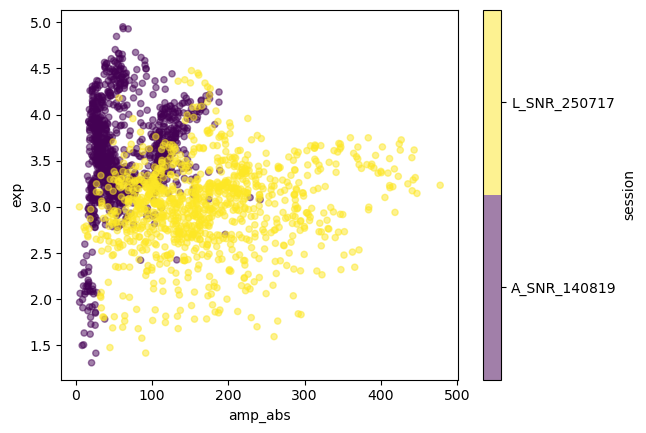

In [58]:
results_df['session'] = pd.Categorical(results_df['session'])
results_df.plot.scatter(x="amp_abs", y="exp", c="session", cmap="viridis", alpha=0.5)

(array([  1.,  11.,  45., 454., 422., 242., 205., 226., 138., 304.]),
 array([ 44.,  79., 114., 149., 184., 219., 254., 289., 324., 359., 394.]),
 <BarContainer object of 10 artists>)

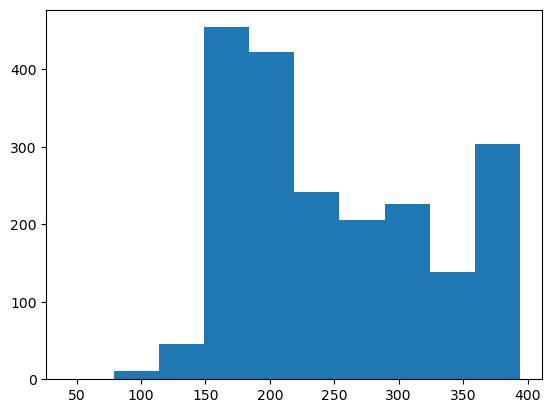

In [59]:
time = np.arange(-0.3, 0.7, 1/FS) * 1000
plt.hist(time[results_df['latency']])


linear regression for each session
run what's needed for additional session to continue with 3